<a href="https://colab.research.google.com/github/girishthorat/Fraud-Detection/blob/main/ML_Fraud_Det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_pickle('/content/drive/MyDrive/Pattern_Recognition /Data.pickle')


In [ ]:
Data.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,5000,5000.0,98.55,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,518,-2483,518,0
1,5000,5000.0,74.51,0.0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,577,-2669,577,0
2,5000,5000.0,7.47,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,605,-3188,605,0
3,5000,5000.0,7.47,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,637,-3156,637,0
4,5000,5000.0,71.18,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,231,-4939,231,0
5,5000,5000.0,30.76,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,257,-1352,257,0
6,5000,5000.0,57.28,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,289,-1441,289,0
7,5000,5000.0,9.37,0.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,302,-1673,302,0
9,5000,5000.0,164.37,0.0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,340,-1360,340,0
10,5000,5000.0,160.18,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,398,-2427,398,0


In [ ]:
Data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
count,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.00000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000
mean,10756.182822,6247.583238,136.975808,4508.599584,0.448723,0.001321,0.991077,0.999914,0.402630,0.302286,0.019557,0.025026,0.190523,0.009548,0.027483,0.001738,0.101908,0.142641,0.095899,0.007725,0.030426,0.00946,0.002811,0.024275,0.043351,0.019039,0.084237,0.257098,0.014070,0.024111,0.065034,0.029137,0.948457,0.025831,883.664201,-3734.202028,448.505963,0.015407
std,11631.241047,8873.694052,147.697222,6457.248679,0.497364,0.036322,0.094038,0.009288,0.490428,0.459249,0.138471,0.156205,0.392714,0.097249,0.163486,0.041655,0.302528,0.349707,0.294453,0.087554,0.171757,0.09680,0.052942,0.153903,0.203645,0.136662,0.277743,0.437034,0.117781,0.153393,0.246586,0.168191,0.221103,0.158631,697.603498,1446.136491,664.036875,0.123164
min,250.000000,-1005.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6422.000000,0.000000,0.000000
25%,5000.000000,1077.520000,33.650000,689.985000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,430.000000,-4983.000000,28.000000,0.000000
50%,7500.000000,3184.285000,87.890000,2451.715000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,680.000000,-3738.000000,160.000000,0.000000
75%,15000.000000,7500.000000,191.500000,5289.120000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1109.000000,-2484.000000,612.000000,0.000000
max,50000.000000,50000.000000,2011.540000,47498.810000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9990.000000,-1066.000000,9990.000000,1.000000


In [ ]:
Data['creditLimit'] = StandardScaler().fit_transform(np.array(Data['creditLimit']).reshape(-1, 1))
Data['availableMoney'] = StandardScaler().fit_transform(np.array(Data['availableMoney']).reshape(-1, 1))
Data['transactionAmount'] = StandardScaler().fit_transform(np.array(Data['transactionAmount']).reshape(-1, 1))
Data['currentBalance'] = StandardScaler().fit_transform(np.array(Data['currentBalance']).reshape(-1, 1))
Data['Difference_open'] = StandardScaler().fit_transform(np.array(Data['Difference_open']).reshape(-1, 1))
Data['Difference_exp'] = StandardScaler().fit_transform(np.array(Data['Difference_exp']).reshape(-1, 1))
Data['Difference_address'] = StandardScaler().fit_transform(np.array(Data['Difference_address']).reshape(-1, 1))



In [ ]:
Data.describe()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
count,7.766680e+05,7.766680e+05,7.766680e+05,7.766680e+05,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.00000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,7.766680e+05,7.766680e+05,7.766680e+05,776668.000000
mean,7.045636e-14,4.183078e-15,4.388764e-16,1.900478e-14,0.448723,0.001321,0.991077,0.999914,0.402630,0.302286,0.019557,0.025026,0.190523,0.009548,0.027483,0.001738,0.101908,0.142641,0.095899,0.007725,0.030426,0.00946,0.002811,0.024275,0.043351,0.019039,0.084237,0.257098,0.014070,0.024111,0.065034,0.029137,0.948457,0.025831,-6.626194e-15,-1.095604e-16,-5.827390e-15,0.015407
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.497364,0.036322,0.094038,0.009288,0.490428,0.459249,0.138471,0.156205,0.392714,0.097249,0.163486,0.041655,0.302528,0.349707,0.294453,0.087554,0.171757,0.09680,0.052942,0.153903,0.203645,0.136662,0.277743,0.437034,0.117781,0.153393,0.246586,0.168191,0.221103,0.158631,1.000001e+00,1.000001e+00,1.000001e+00,0.123164
min,-9.032733e-01,-8.173843e-01,-9.274101e-01,-6.982235e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.265281e+00,-1.858607e+00,-6.754237e-01,0.000000
25%,-4.948901e-01,-5.826284e-01,-6.995790e-01,-5.913691e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.503185e-01,-8.635414e-01,-6.332574e-01,0.000000
50%,-2.799516e-01,-3.452114e-01,-3.323410e-01,-3.185391e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.919486e-01,-2.626290e-03,-4.344731e-01,0.000000
75%,3.648639e-01,1.411382e-01,3.691622e-01,1.208752e-01,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.230144e-01,8.645123e-01,2.462124e-01,0.000000
max,3.374003e+00,4.930578e+00,1.269195e+01,6.657671e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [ ]:
Data.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,-0.49489,-0.140594,-0.260166,-0.698223,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.524172,0.865204,0.104654,0
1,-0.49489,-0.140594,-0.422932,-0.698223,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.439597,0.736585,0.193504,0
2,-0.49489,-0.140594,-0.876834,-0.698223,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.399460,0.377698,0.235671,0
3,-0.49489,-0.140594,-0.876834,-0.698223,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.353588,0.399826,0.283861,0
4,-0.49489,-0.140594,-0.445478,-0.698223,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.935581,-0.833116,-0.327551,0
5,-0.49489,-0.140594,-0.719146,-0.698223,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.898311,1.647288,-0.288397,0
6,-0.49489,-0.140594,-0.539589,-0.698223,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.852439,1.585745,-0.240207,0
7,-0.49489,-0.140594,-0.863969,-0.698223,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.833804,1.425317,-0.220629,0
9,-0.49489,-0.140594,0.185475,-0.698223,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.779332,1.641756,-0.163404,0
10,-0.49489,-0.140594,0.157107,-0.698223,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.696190,0.903928,-0.076059,0


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776668 entries, 0 to 786362
Data columns (total 38 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   creditLimit                                776668 non-null  float64
 1   availableMoney                             776668 non-null  float64
 2   transactionAmount                          776668 non-null  float64
 3   currentBalance                             776668 non-null  float64
 4   cardPresent                                776668 non-null  int64  
 5   expirationDateKeyInMatch                   776668 non-null  int64  
 6   isCVVcorrect                               776668 non-null  int64  
 7   isCountrySame                              776668 non-null  int64  
 8   posEntryMode_05                            776668 non-null  uint8  
 9   posEntryMode_09                            776668 non-null  uint8  
 10  posEntry

In [ ]:
cols = [i for i in range(8,32)]
cols

In [ ]:
X= Data.drop(['isFraud'], axis=1)
y= Data['isFraud']

In [ ]:
X= X.drop(X.columns[cols],axis=1)



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 9597
Before OverSampling, counts of label '0': 611737 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1223474, 13)
After OverSampling, the shape of train_y: (1223474,) 

After OverSampling, counts of label '1': 611737
After OverSampling, counts of label '0': 611737


In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 9569
Before Undersampling, counts of label '0': 611765 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (19138, 37)
After Undersampling, the shape of train_y: (19138,) 

After Undersampling, counts of label '1': 9569
After Undersampling, counts of label '0': 9569


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res, y_train_res)
rf_yhat = rf.predict(X_test)
print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    152965
           1       0.04      0.07      0.05      2369

    accuracy                           0.96    155334
   macro avg       0.51      0.52      0.52    155334
weighted avg       0.97      0.96      0.97    155334



In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 512,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_test.value_counts()
#X_test.shape

0    152996
1      2338
Name: isFraud, dtype: int64

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_miss, y_train_miss)
lr_yhat = lr.predict(X_test)
print(classification_report(y_test, lr_yhat))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.98      0.14      0.25    152937
           1       0.02      0.84      0.03      2397

    accuracy                           0.15    155334
   macro avg       0.50      0.49      0.14    155334
weighted avg       0.97      0.15      0.24    155334



In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train_res, y_train_res)
xgb_yhat = xgb.predict(X_test.values)
print(classification_report(y_test, xgb_yhat))

              precision    recall  f1-score   support

           0       0.99      0.67      0.80    152965
           1       0.03      0.62      0.05      2369

    accuracy                           0.67    155334
   macro avg       0.51      0.64      0.43    155334
weighted avg       0.98      0.67      0.79    155334



In [ ]:
sum(xgb_yhat)

2405

In [ ]:
rfc = RandomForestClassifier()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_miss, y_train_miss)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 7


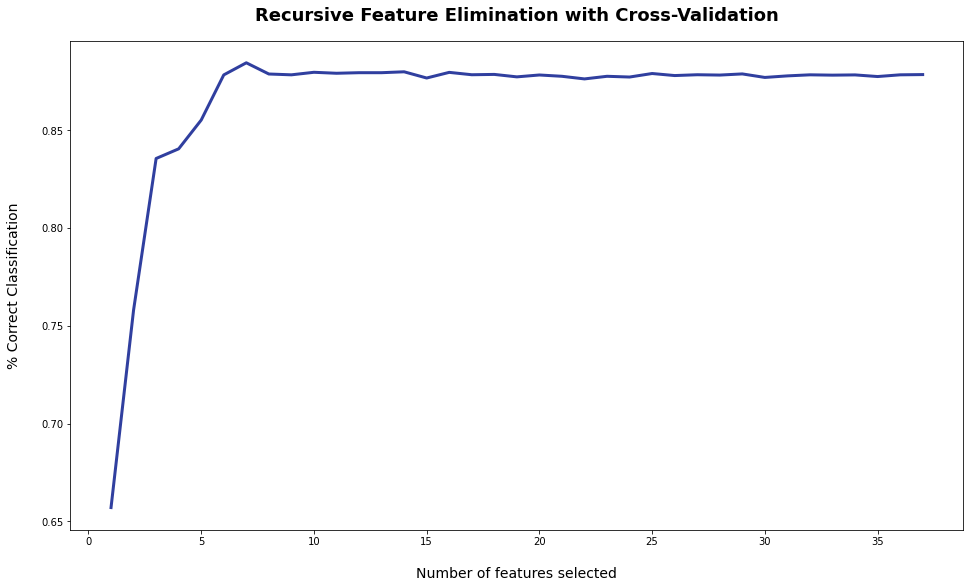

In [ ]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == True)[0])

[ 0  1  2  3 34 35 36]


In [ ]:
rfecv.estimator_.feature_importances_

array([0.17955968, 0.16925778, 0.13573878, 0.14615725, 0.14938563,
       0.06667779, 0.1532231 ])

In [ ]:
Data.iloc[:,[ 0,  1,  2,  3, 34, 35, 36]]

,creditLimit,availableMoney,transactionAmount,currentBalance,Difference_open,Difference_exp,Difference_address
0,5000,5000.00,98.55,0.00,518,-2483,518
1,5000,5000.00,74.51,0.00,577,-2669,577
2,5000,5000.00,7.47,0.00,605,-3188,605
3,5000,5000.00,7.47,0.00,637,-3156,637
4,5000,5000.00,71.18,0.00,231,-4939,231
...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1095.04,1582,-2170,1582
786359,50000,48785.04,18.89,1214.96,1585,-2410,1585
786360,50000,48766.15,49.43,1233.85,1587,-3139,1587
786361,50000,48716.72,49.89,1283.28,1589,-2010,1589


In [ ]:
Dataf=Data.iloc[:,[ 0,  1,  2,  3, 34, 35, 36, 37]]

In [ ]:
Dataf.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance,Difference_open,Difference_exp,Difference_address,isFraud
0,5000,5000.0,98.55,0.0,518,-2483,518,0
1,5000,5000.0,74.51,0.0,577,-2669,577,0
2,5000,5000.0,7.47,0.0,605,-3188,605,0
3,5000,5000.0,7.47,0.0,637,-3156,637,0
4,5000,5000.0,71.18,0.0,231,-4939,231,0
5,5000,5000.0,30.76,0.0,257,-1352,257,0
6,5000,5000.0,57.28,0.0,289,-1441,289,0
7,5000,5000.0,9.37,0.0,302,-1673,302,0
9,5000,5000.0,164.37,0.0,340,-1360,340,0
10,5000,5000.0,160.18,0.0,398,-2427,398,0


In [ ]:
Xf= Dataf.drop(['isFraud'], axis=1)
yf= Dataf['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size = 0.2)

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 9504
Before Undersampling, counts of label '0': 611830 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (19008, 7)
After Undersampling, the shape of train_y: (19008,) 

After Undersampling, counts of label '1': 9504
After Undersampling, counts of label '0': 9504


In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_miss, y_train_miss)
rf_yhat = rf.predict(X_test)

print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

           0       0.98      0.11      0.19    152872
           1       0.02      0.90      0.03      2462

    accuracy                           0.12    155334
   macro avg       0.50      0.50      0.11    155334
weighted avg       0.97      0.12      0.19    155334



In [ ]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train_miss, y_train_miss)
xgb_yhat = xgb.predict(X_test.values)

print(classification_report(y_test, xgb_yhat))

              precision    recall  f1-score   support

           0       0.99      0.15      0.26    152872
           1       0.02      0.87      0.03      2462

    accuracy                           0.16    155334
   macro avg       0.50      0.51      0.14    155334
weighted avg       0.97      0.16      0.25    155334



In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(Xf, yf)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 9504
Before OverSampling, counts of label '0': 611830 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1529404, 7)
After OverSampling, the shape of train_y: (1529404,) 

After OverSampling, counts of label '1': 764702
After OverSampling, counts of label '0': 764702


In [ ]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_res, y_train_res)
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.99      0.66      0.79    152992
           1       0.03      0.70      0.06      2342

    accuracy                           0.66    155334
   macro avg       0.51      0.68      0.42    155334
weighted avg       0.98      0.66      0.78    155334



In [ ]:
svm = SVC()
svm.fit(X_train_miss, y_train_miss)
svm_yhat = svm.predict(X_test)
print(classification_report(y_test, svm_yhat))

              precision    recall  f1-score   support

           0       0.99      0.19      0.32    152965
           1       0.02      0.81      0.03      2369

    accuracy                           0.20    155334
   macro avg       0.50      0.50      0.18    155334
weighted avg       0.97      0.20      0.32    155334



In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_miss, y_train_miss)
knn_yhat = knn.predict(X_test)
print(classification_report(y_test, knn_yhat))

              precision    recall  f1-score   support

           0       0.98      0.19      0.32    152937
           1       0.02      0.79      0.03      2397

    accuracy                           0.20    155334
   macro avg       0.50      0.49      0.18    155334
weighted avg       0.97      0.20      0.32    155334



In [ ]:
y.head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
9     0
10    0
Name: isFraud, dtype: int64